In [1]:
%%HTML
<style>
.container { width:100% }
</style>

# Brute Force CSP Solver

## Utility Functions

The function `arb(S)` takes a set `S` as input and returns an arbitrary element from 
this set.  The set `S`is not changed.

In [2]:
def arb(S):
    for x in S:
        return x

The procedure `solve(P)` takes a a <b style="color:blue">constraint satisfaction problem</b> 
`P` as input.  Here `P` is a triple of the form 
$$ \mathcal{P} = \langle \mathtt{Vars}, \mathtt{Values}, \mathtt{Constraints} \rangle $$
where 
- $\mathtt{Vars}$ is a set of strings which serve as <b style="color:blue">variables</b>,
- $\mathtt{Values}$ is a set of <b style="color:blue">values</b> that can be assigned 
  to the variables in $\mathtt{Vars}$.
- $\mathtt{Constraints}$ is a set of formulas from first order logic.  
  Each of these formulas is  called a <b style="color:blue">constraint</b> of $\mathcal{P}$.

In [3]:
def solve(P):
    return brute_force_search({}, P)

The function `brute_force_search` takes two arguments:
- `Assignment` is a <em style="color:blue">partial variable assignment</em> that is
   represented as a dictionary.  Initially, this assignment will be the  empty
   dictionary.  Every recursive call of `brute_force_search` adds the assignment of one 
   variable to  the given assignment. 
- `csp` is a constraint satisfaction problem.

The implementation of `brute_force_search` works as follows:
- If all variables have been assigned a value, the dictionary `Assignment` will have the same number of entries as the set `Variables` has elements.  Hence, in that case `Assignment` is a complete assignment of all variables and we have to test whether    all constraints are satisfied.  This is done using the auxiliary procedure `check_all_constraints`.
- Otherwise, we pick a variable that has not been assigned and try all possible 
  values for this variable.

In [4]:
def brute_force_search(Assignment, csp):
    Variables, Values, Constraints = csp
    if len(Assignment) == len(Variables): # all variables have been assigned
        if check_all_constraints(Assignment, Constraints):
            return Assignment
        else:
            return None
    var = arb(Variables - Assignment.keys())
    for value in Values:
        NewAss = Assignment.copy()
        NewAss[var] = value
        result = brute_force_search(NewAss, csp)
        if result != None:
            return result

The function `check_all_constraints` takes two arguments:
- `Assignment` is a variable assignment that is represented as a dictionary.
- `Constraints` is a set of Boolean Python expressions.
The function returns `True` iff all these expression evaluate as `True` using
the given `Assignment`.

Below, we have to create a copy of `Assignment` since the function `eval` modifies the assignment given to it.

In [5]:
def check_all_constraints(Assignment, Constraints):
    A = Assignment.copy()
    return all(eval(f, A) for f in Constraints)

The notebook `N-Queens-Problem-CSP.ipynb` provides the function
`create_csp(n)` that returns a CSP encoding the 
<b style="color:blue">n queens puzzle</b>.

In [6]:
%run N-Queens-Problem-CSP.ipynb

Variables:   {'V3', 'V1', 'V4', 'V2'}
Values:      {1, 2, 3, 4}
Constraints:
             abs(V3 - V1) != 2
             V2 != V4
             abs(V4 - V2) != 2
             V2 != V3
             V3 != V4
             abs(V4 - V1) != 3
             V1 != V3
             abs(V4 - V3) != 1
             abs(V2 - V1) != 1
             abs(V3 - V2) != 1
             V1 != V4
             V1 != V2


In [7]:
P = create_csp(8)

Brute force search takes about 28 seconds on my desktop to solve the eight queens puzzle.

In [8]:
%%time
Solution = solve(P)
print(f'Solution = {Solution}')

Solution = {'V8': 1, 'V4': 2, 'V3': 4, 'V1': 3, 'V6': 5, 'V5': 8, 'V2': 6, 'V7': 7}
CPU times: user 11.3 s, sys: 438 ms, total: 11.7 s
Wall time: 11.7 s


## Displaying the Solution

In order to have a more convenient view of the solution of the 8 queens
puzzle, we have to install the library
<a href="https://python-chess.readthedocs.io/en/latest/">python-chess</a>.
After activating the appropriate  Python environment, this can be done using the following command:
```
   pip install python-chess
```

In [9]:
import chess

The function `show_solution(Solution)` takes a dictionary that contains a variable assignment that is a solution to the 
<b style="color:blue">eight queens puzzle</b>.  It displays this Solution on a chess board.

In [10]:
def show_solution(Solution):
    board = chess.Board(None)  # create empty chess board
    queen = chess.Piece(chess.QUEEN, True)
    for row in range(1, 8+1):
        col = Solution['V'+str(row)]
        field_number = (row - 1) * 8 + col - 1
        board.set_piece_at(field_number, queen)
    display(board)

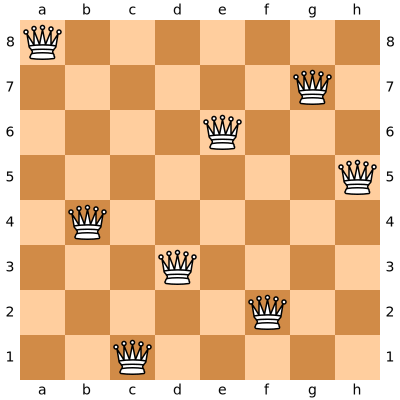

In [11]:
show_solution(Solution)